In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns

In [134]:
def simple_addcyto(t, y, deathrates, repairrate, ctldamagerate, proliferationrate, ctlchemokillrate, chemodamagerate, 
                   ctlrecruitment, ctlremoval, ctlchemots, tumorchemots):
    imax = len(deathrates)
    ti = y[:imax]
    ctl, chemo = y[imax:]
    dti = np.zeros_like(ti)
    dti[:-1] += repairrate * ti[1:]  # repair
    dti[1:] -= repairrate * ti[1:]
    dti -= deathrates * ti  # tumor cell death

    dti[0] += proliferationrate * ti[0]  # tumor cell proliferation

    dti[1:] += (ctldamagerate * ctl + chemodamagerate * chemo / (tumorchemots + chemo)) * ti[:-1]  # tumor cell damage
    dti[:-1] -= (ctldamagerate * ctl + chemodamagerate * chemo / (tumorchemots + chemo)) * ti[:-1]
    dctl = ctlrecruitment - ctlremoval * ctl - ctlchemokillrate * chemo * ctl / (ctlchemots + chemo)  # ctl kill by chemo, recruitment, removal
    dchemo = 0.
    return [*dti, dctl, dchemo]
    

In [262]:
deathrates = np.array((0., 0.1, 0.5))
repairrate = 6
ctldamagerate = 1
proliferationrate =  1. / 24
ctlchemokillrate = 4
chemodamagerate = 1
ctlrecruitment = 1
ctlremoval = 1
ctlchemots = 4
tumorchemots = 0.1

ctl0 = 1.
chemo0 = 20.

y0 = np.array([1., 0, 0, ctl0, chemo0])
tmax = 100
ts = np.linspace(0, tmax, 101)

In [263]:
sol = solve_ivp(simple_addcyto, (0, tmax), y0, t_eval=ts, args=(deathrates, repairrate, ctldamagerate, proliferationrate, ctlchemokillrate, chemodamagerate, 
                   ctlrecruitment, ctlremoval, ctlchemots, tumorchemots))

In [264]:
simple_addcyto(0, y0, deathrates, repairrate, ctldamagerate, proliferationrate, ctlchemokillrate, chemodamagerate, 
                   ctlrecruitment, ctlremoval, ctlchemots, tumorchemots)

[-1.9533582089552237, 1.9950248756218905, 0.0, -3.3333333333333335, 0.0]

In [265]:
imax = len(deathrates)
T = sol.y[:imax].sum(0)
ctl = sol.y[imax]
chemo = sol.y[-1]

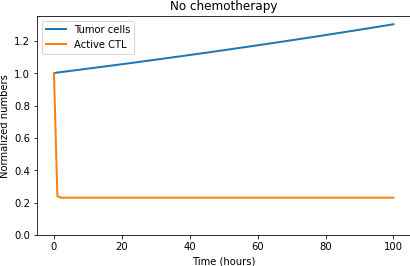

In [266]:
plt.plot(sol.t, T, label='Tumor cells')
plt.plot(sol.t, ctl, label='Active CTL')
plt.legend()
plt.xlabel('Time (hours)')
plt.ylabel('Normalized numbers')
plt.title('No chemotherapy')
plt.ylim(0)
# plt.yscale('log')
plt.savefig('hidosechemo.svg')